In [41]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import joblib

In [24]:
df = pd.read_csv('NPAR6.csv')
df.head()

,subject_id,hadm_id,stay_id,intime,race,gender,age,mortality_icu,mortality_hosp,los,...,alcoholic,biliary,drug_induced,unspecified,mortality_7d,mortality_28d,mortality_90d,mortality_1y,has_kidney_disease,has_sepsis
0,19753686,29945708,30469520,2152-04-07T19:23:59,UNKNOWN,M,50,0,0,4.701343,...,0,1,1,1,0,0,0,0,0,0
1,10442603,23644640,31663173,2125-02-25T15:33:43,UNKNOWN,M,67,1,1,1.110764,...,1,0,0,1,1,1,1,1,0,1
2,15696172,21774504,36542183,2187-02-07T00:52:41,UNKNOWN,M,63,1,1,1.417917,...,0,0,0,1,1,1,1,1,0,1
3,19352969,21921993,34589708,2180-10-06T13:15:00,WHITE,F,67,1,1,1.496956,...,0,1,0,1,1,1,1,1,0,0
4,13734425,25179112,35877842,2132-09-06T09:00:00,WHITE,F,91,1,1,2.088681,...,0,1,0,1,1,1,1,1,0,0


In [25]:
encoder = OrdinalEncoder()
df[['gender', 'race']] = encoder.fit_transform(df[['gender', 'race']])

In [26]:
df.head()

,subject_id,hadm_id,stay_id,intime,race,gender,age,mortality_icu,mortality_hosp,los,...,alcoholic,biliary,drug_induced,unspecified,mortality_7d,mortality_28d,mortality_90d,mortality_1y,has_kidney_disease,has_sepsis
0,19753686,29945708,30469520,2152-04-07T19:23:59,23.0,1.0,50,0,0,4.701343,...,0,1,1,1,0,0,0,0,0,0
1,10442603,23644640,31663173,2125-02-25T15:33:43,23.0,1.0,67,1,1,1.110764,...,1,0,0,1,1,1,1,1,0,1
2,15696172,21774504,36542183,2187-02-07T00:52:41,23.0,1.0,63,1,1,1.417917,...,0,0,0,1,1,1,1,1,0,1
3,19352969,21921993,34589708,2180-10-06T13:15:00,24.0,0.0,67,1,1,1.496956,...,0,1,0,1,1,1,1,1,0,0
4,13734425,25179112,35877842,2132-09-06T09:00:00,24.0,0.0,91,1,1,2.088681,...,0,1,0,1,1,1,1,1,0,0


In [27]:
[ (col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0]

[('dod', 384),
 ('inr_max', 23),
 ('pt_max', 23),
 ('ptt_max', 26),
 ('bilirubin_total_max', 7),
 ('calcium_min', 4),
 ('ast_max', 7),
 ('alp_max', 7),
 ('rdw_max', 1),
 ('hdl', 503),
 ('ldl', 506),
 ('cholesterol', 466),
 ('triglycerides', 211),
 ('alt_max', 10),
 ('total_protein_max', 606),
 ('amylase_max', 432),
 ('lipase', 51),
 ('SII', 4),
 ('NLR', 4),
 ('PLR', 4),
 ('LMR', 14),
 ('SIRI', 4),
 ('temperature_mean', 2)]

In [28]:
[ col for col in df.columns if df[col].isna().sum() > 0]

['dod',
 'inr_max',
 'pt_max',
 'ptt_max',
 'bilirubin_total_max',
 'calcium_min',
 'ast_max',
 'alp_max',
 'rdw_max',
 'hdl',
 'ldl',
 'cholesterol',
 'triglycerides',
 'alt_max',
 'total_protein_max',
 'amylase_max',
 'lipase',
 'SII',
 'NLR',
 'PLR',
 'LMR',
 'SIRI',
 'temperature_mean']

In [29]:
imp = IterativeImputer(max_iter=100)
cols_miss = ['inr_max','pt_max','ptt_max','bilirubin_total_max','calcium_min','ast_max','alp_max','rdw_max','hdl','ldl','cholesterol','triglycerides','alt_max','total_protein_max','amylase_max','lipase','SII','NLR','PLR','LMR','SIRI','temperature_mean']
df[cols_miss] = imp.fit_transform(df[cols_miss])

In [30]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'race', 'gender', 'age',
       'mortality_icu', 'mortality_hosp', 'los', 'hosp_los', 'icu_los',
       'admittime', 'dod', 'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cere

In [31]:
cols = [
    'race', 'gender', 'age',
       'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cerebrovascular_disease', 'chronic_pulmonary_disease', 'renal_disease',
       'malignant_cancer', 'diabetes_with_cc', 'diabetes_without_cc',
       'severe_liver_disease', 'sepsis', 'aki', 'octreotide', 'vasopressin',
       'betablocker', 'mv', 'crrt', 'ercp', 'pancreatic_drainage',
       'diabetes_mellitus', 'bisap_score', 'alcoholic', 'biliary',
       'drug_induced', 'unspecified', 'has_kidney_disease', 'has_sepsis'
]
X, y = df[cols], df['mortality_28d']

In [32]:
X_train, X_test, y_train, y_test, = train_test_split(X, y)

In [33]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb.score(X_train, y_train), adb.score(X_test, y_test)

(0.9426751592356688, 0.8789808917197452)

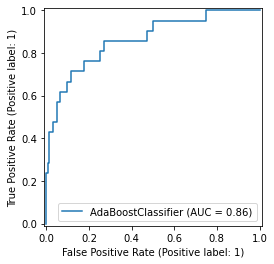

In [34]:
RocCurveDisplay.from_estimator(estimator=adb, X = X_test, y = y_test)
plt.show()

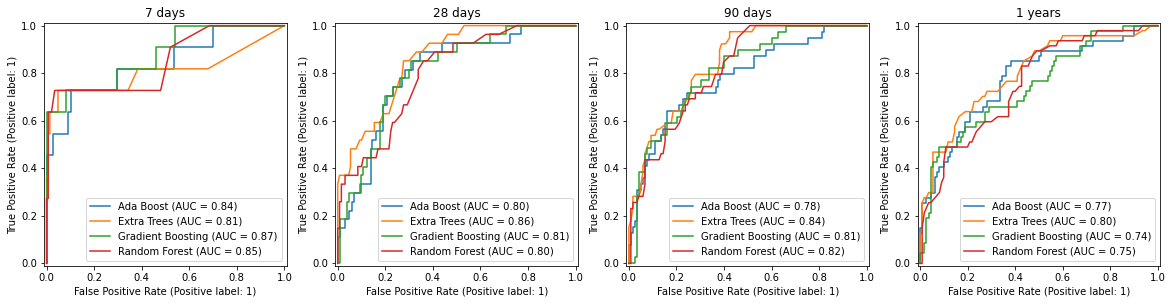

In [40]:
models = {
    'Ada Boost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
X, Y = df[cols], df[mortalities]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2026)
titles = ['7 days', '28 days', '90 days', '1 years']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
for i in range(len(mortalities)):
    y_train, y_test = Y_train[mortalities[i]], Y_test[mortalities[i]]
    for name in models:
        model = models[name]
        model.fit(X_train, y_train)
        RocCurveDisplay.from_estimator(estimator=model, X=X_test, y=y_test, ax=axes[i], name=name)
    axes[i].set_title(titles[i])
plt.show()


In [44]:
X_test.to_csv('X_test.csv',index=None )
Y_test.to_csv('Y_test.csv',index=None )

In [45]:
for name in models:
    model = models[name]
    joblib.dump(model, f'{name.replace(" ", "")}.joblib')
